Goal: Classify cell types in the mouse brain based on morphometric data. Total cells: 142,193. Total classes: 4, class population is imbalanced.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# read the data file
file_path = 'CP_meta_morpho_angles.xlsx'
df = pd.read_excel(file_path)

In [3]:
# examine data
print(df.head())

  age_classification              brain_region1           brain_region2  \
0       not reported  peripheral nervous system                 enteric   
1       not reported  peripheral nervous system                 enteric   
2       not reported  peripheral nervous system                 enteric   
3              adult                     retina   inner plexiform layer   
4              young                     retina   inner plexiform layer   

       brain_region3 brain_region4 brain_region5 brain_region6 type1  \
0   myenteric plexus           NaN           NaN           NaN  Glia   
1   myenteric plexus           NaN           NaN           NaN  Glia   
2   myenteric plexus           NaN           NaN           NaN  Glia   
3                NaN           NaN           NaN           NaN  Glia   
4                NaN           NaN           NaN           NaN  Glia   

                                               type2                 type3  \
0   glial fibrillary acidic protein (G

In [4]:
# examine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141897 entries, 0 to 141896
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age_classification      141897 non-null  object 
 1   brain_region1           141861 non-null  object 
 2   brain_region2           119678 non-null  object 
 3   brain_region3           65780 non-null   object 
 4   brain_region4           26993 non-null   object 
 5   brain_region5           4948 non-null    object 
 6   brain_region6           181 non-null     object 
 7   type1                   141794 non-null  object 
 8   type2                   130838 non-null  object 
 9   type3                   85246 non-null   object 
 10  type4                   10047 non-null   object 
 11  type5                   1337 non-null    object 
 12  type6                   93 non-null      object 
 13  type7                   27 non-null      object 
 14  type8               

In [5]:
df.describe()

,neuron_id,bif_ampl_local,bif_ampl_remote,branch_Order,contraction,depth,diameter,eucDistance,fractal_Dim,fragmentation,...,partition_asymmetry,pathDistance,pk_classic,soma_Surface,surface,volume,width,number of bifurcations,local mean,global mean
count,141897.000000,141897.000000,141897.000000,141897.000000,141897.000000,141897.000000,141897.000000,141897.000000,141897.000000,141897.000000,...,141897.000000,141897.000000,141897.000000,1.117050e+05,1.418970e+05,1.418970e+05,141897.000000,141886.000000,141886.000000,141886.000000
mean,176418.870716,62.438141,69.948979,10.448830,0.898728,120.014971,1.039858,299.431003,1.038602,2208.067965,...,0.515152,471.611909,3.420047,7.962907e+03,9.888401e+03,6.880487e+03,199.995426,46.517429,0.943466,0.922070
std,69566.942117,24.772802,21.282906,10.665729,0.050514,557.871652,0.736432,914.499284,0.027496,4619.220914,...,0.172600,1601.000667,489.519913,2.662588e+05,7.949476e+04,2.928375e+05,620.425533,94.599591,0.121903,0.117413
min,860.000000,0.000000,0.000000,0.000000,0.138545,0.000000,0.011881,2.095180,1.000000,4.000000,...,0.000000,2.245890,0.000000,2.483700e-02,1.163310e+00,1.454140e-02,0.078868,0.000000,0.000000,0.000000
25%,121654.000000,45.243500,59.229500,5.000000,0.883728,11.700000,0.380000,39.948800,1.022010,437.000000,...,0.456410,57.795800,1.932430,1.787470e+01,8.863290e+02,1.356760e+02,23.060000,10.000000,0.942003,0.921407
50%,188369.000000,58.035700,71.391800,8.000000,0.907313,30.860000,1.002840,93.201600,1.034330,1047.000000,...,0.549020,120.390000,2.000000,1.694040e+02,2.087510e+03,6.533430e+02,50.190000,22.000000,0.972063,0.939424
75%,227295.000000,77.845800,81.109400,13.000000,0.929371,50.220000,1.396230,229.397000,1.045160,2427.000000,...,0.622222,277.736000,2.000000,6.508200e+02,4.939620e+03,1.742860e+03,149.490000,48.000000,0.985967,0.956881
max,298312.000000,180.000000,179.189000,375.000000,0.998912,18333.300000,23.942000,35025.800000,1.753360,181848.000000,...,1.000000,47682.300000,183549.000000,2.400070e+07,8.530640e+06,7.752250e+07,32160.000000,7116.000000,1.000000,1.000000


In [6]:
# chk for missing values
df.isnull().sum()

age_classification             0
brain_region1                 36
brain_region2              22219
brain_region3              76117
brain_region4             114904
brain_region5             136949
brain_region6             141716
type1                        103
type2                      11059
type3                      56651
type4                     131850
type5                     140560
type6                     141804
type7                     141870
type8                     141878
type9                     141888
type10                    141892
type11                    141893
type12                    141895
type13                    141895
type14                    141895
type15                    141895
Type                        6347
domain                         0
gender                         0
neuron_id                      0
neuron_name                    0
bif_ampl_local                 0
bif_ampl_remote                0
branch_Order                   0
contractio

In [7]:
# drop columns that have too many missing values or do not make logical sense to be part of the model
# not replacing missing values with mean/mode/etc. as this is biological data
# upon examinination, types 1 to 15 do not seem to have proper data to add value to the model - removing these columns and others with high missing values
# 'domain' can be dropped as it does not make sense to be added to this classification model - domain gives away information whether a cell is of neuronal or glial type
# drop 'number of bifurcations' - duplicate of 'n_bifs'
columns_to_drop = [
    'age_classification','brain_region1','brain_region2', 'brain_region3', 'brain_region4', 'brain_region5', 'brain_region6',
    'type1', 'type2', 'type3', 'type4', 'type5', 'type6', 'type7', 'type8', 'type9', 'type10', 'type11', 'type12', 
    'type13', 'type14', 'type15', 'domain', 'neuron_id.1', 'neuron_name.1', 'number of bifurcations', 'soma_Surface', 'gender'
]
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head()

,Type,neuron_id,neuron_name,bif_ampl_local,bif_ampl_remote,branch_Order,contraction,depth,diameter,eucDistance,...,n_branch,n_stems,partition_asymmetry,pathDistance,pk_classic,surface,volume,width,local mean,global mean
0,NaN,88078,enteric_glial_cell_type1,74.7496,76.1177,60.0,0.918600,29.09,0.533556,26.7723,...,772,2.0,0.824029,48.7072,1.96275,1673.340,332.7730,6.09,0.915798,0.892410
1,NaN,88077,enteric_glial_cell_type2,74.9511,77.5400,99.0,0.925553,27.75,0.329527,64.3640,...,1438,2.0,0.733627,77.9878,1.78389,1468.360,161.5210,4.65,0.952659,0.931036
2,NaN,88076,enteric_glial_cell_type3,87.6338,87.5718,105.0,0.928922,68.97,0.672608,85.4851,...,1066,2.0,0.892187,134.2160,1.69520,3159.030,740.5740,8.09,0.948057,0.929004
3,NaN,190739,cell10_ko_older_traces,93.3116,90.3454,41.0,0.833869,35.00,0.250000,41.2394,...,227,1.0,0.588187,64.9901,2.00000,676.965,42.3103,28.88,0.922047,0.914607
4,NaN,190744,cell10_wt_younger_traces,101.0920,89.6330,30.0,0.807871,40.00,0.250000,49.3294,...,140,2.0,0.600058,77.7447,2.00000,368.405,23.0253,24.54,0.883781,0.927784


In [8]:
# target column 'Type' has 6347 missing values
# drop rows with missing values for target column
df = df.dropna(subset=['Type'])

In [9]:
# Drop rows with missing values in other columns
critical_columns = ['n_stems', 'local mean', 'global mean']
df = df.dropna(subset=critical_columns)

In [10]:
# Convert Type to category
df['Type'] = df['Type'].astype('category')

In [11]:
df.isnull().sum()

Type                   0
neuron_id              0
neuron_name            0
bif_ampl_local         0
bif_ampl_remote        0
branch_Order           0
contraction            0
depth                  0
diameter               0
eucDistance            0
fractal_Dim            0
fragmentation          0
height                 0
length                 0
n_bifs                 0
n_branch               0
n_stems                0
partition_asymmetry    0
pathDistance           0
pk_classic             0
surface                0
volume                 0
width                  0
local mean             0
global mean            0
dtype: int64

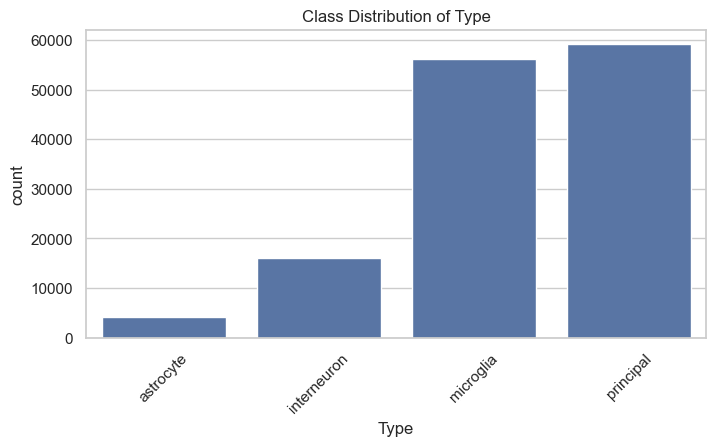

In [12]:
# Examine distribution of target column 'Type'
sns.set(style='whitegrid')

plt.figure(figsize=(8, 4))
sns.countplot(x='Type', data=df)
plt.title('Class Distribution of Type')
plt.xticks(rotation=45)
plt.show()

In [13]:
df['Type'].value_counts()

Type
principal      59125
microglia      56237
interneuron    15980
astrocyte       4196
Name: count, dtype: int64

The target column seems highly imbalanced

In [14]:
# Summary statistics for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nSummary Statistics (Numerical Columns):")
print(df[numerical_cols].describe())


Summary Statistics (Numerical Columns):
           neuron_id  bif_ampl_local  bif_ampl_remote   branch_Order  \
count  135538.000000   135538.000000    135538.000000  135538.000000   
mean   176859.672734       62.197927        69.329586      10.380990   
std     70183.281935       24.575890        20.953202      10.559536   
min       860.000000        0.000000         0.000000       0.000000   
25%    119895.250000       45.000000        58.737175       5.000000   
50%    191963.500000       57.770550        70.844850       8.000000   
75%    228511.750000       77.723325        80.243075      13.000000   
max    298312.000000      180.000000       179.189000     375.000000   

         contraction          depth       diameter    eucDistance  \
count  135538.000000  135538.000000  135538.000000  135538.000000   
mean        0.897872     114.505531       1.010298     289.634550   
std         0.049800     535.020577       0.718567     881.130834   
min         0.138545       0.00000

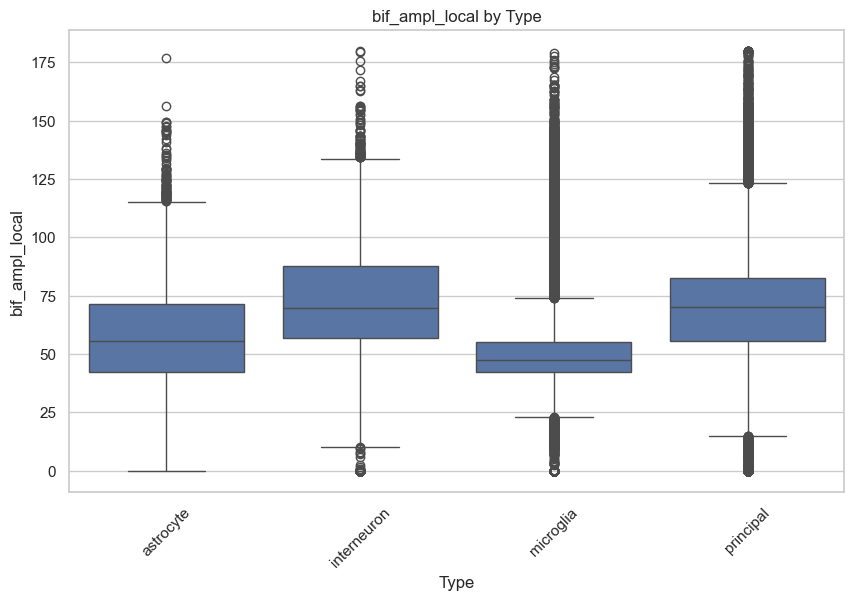

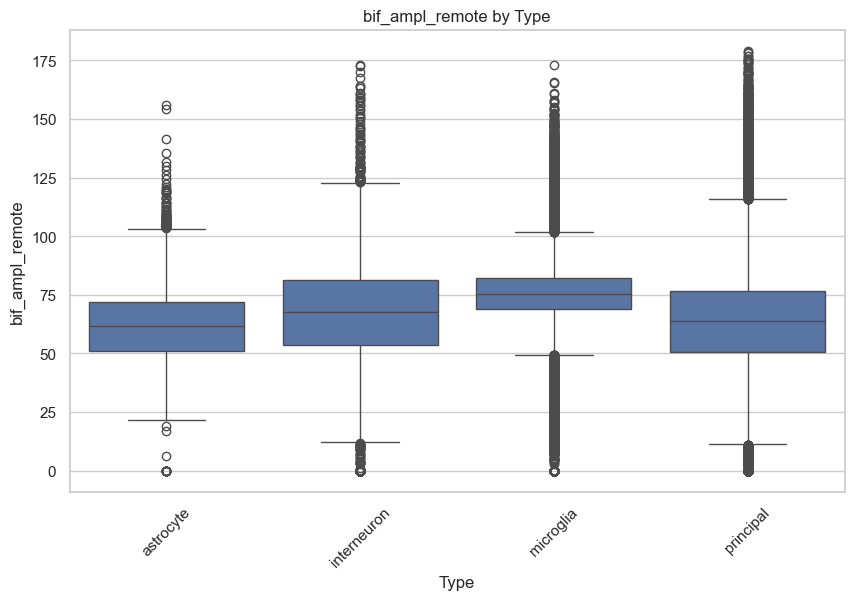

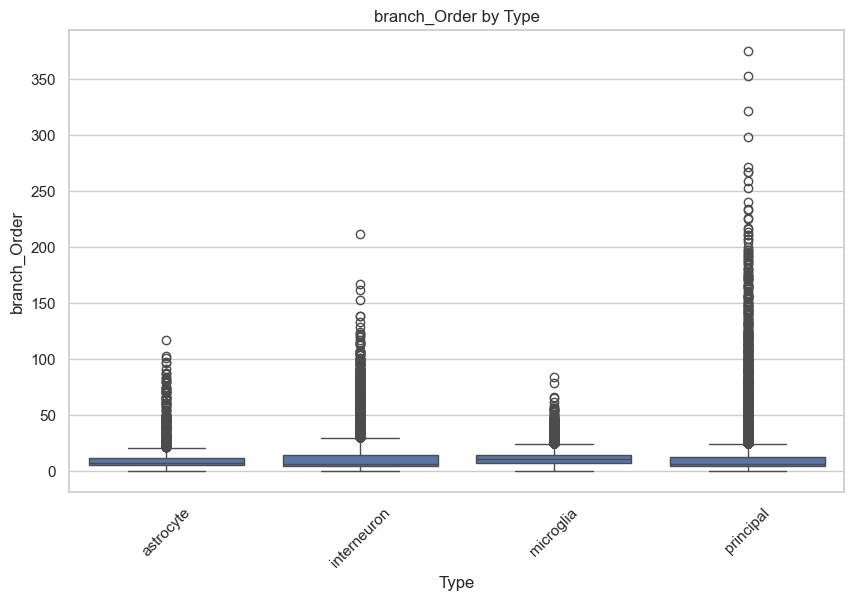

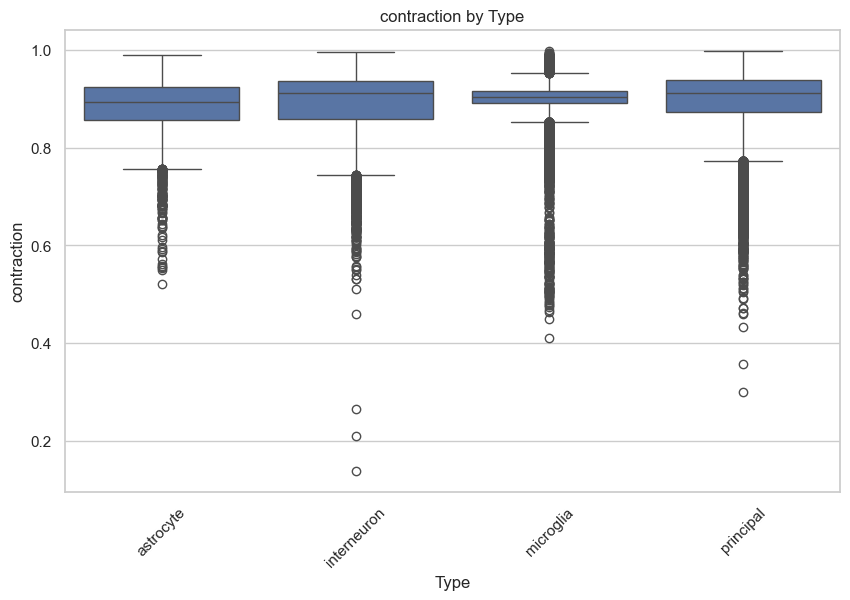

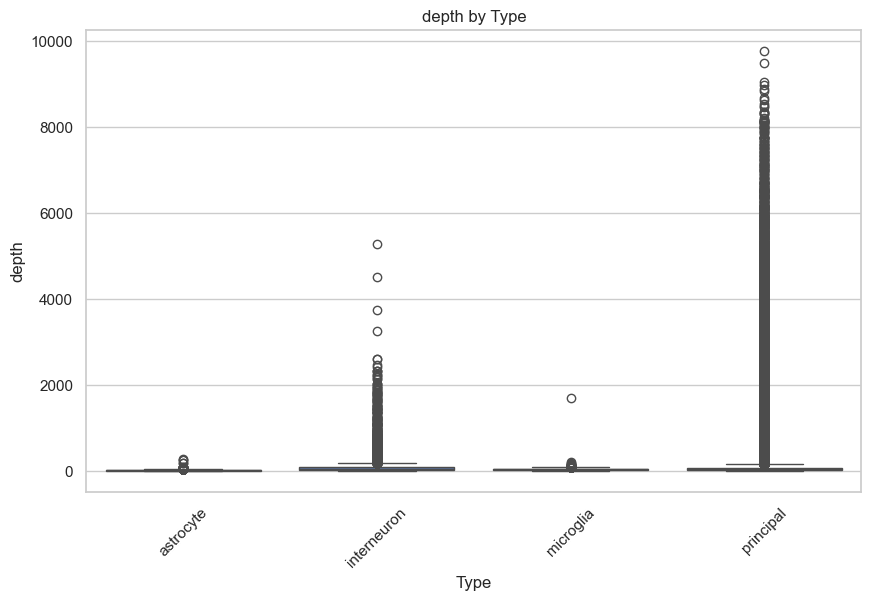

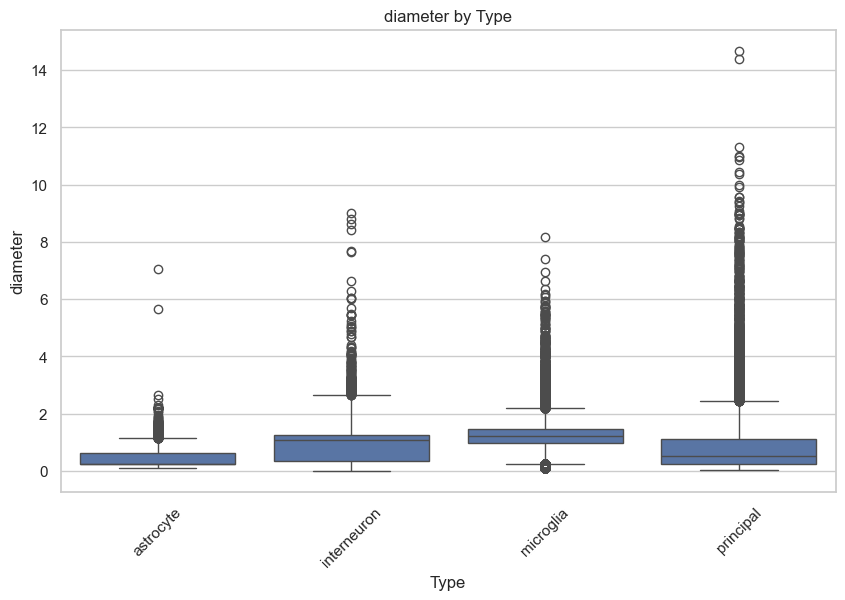

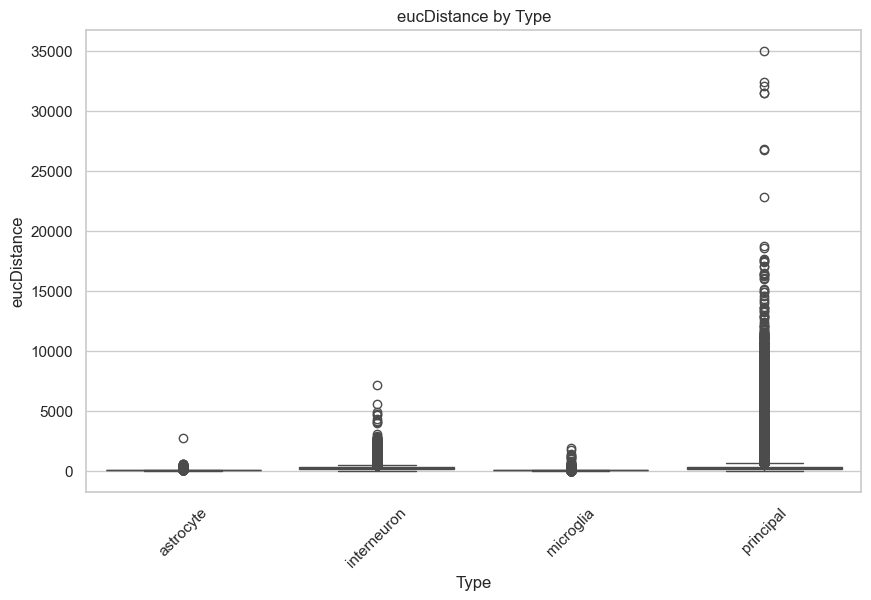

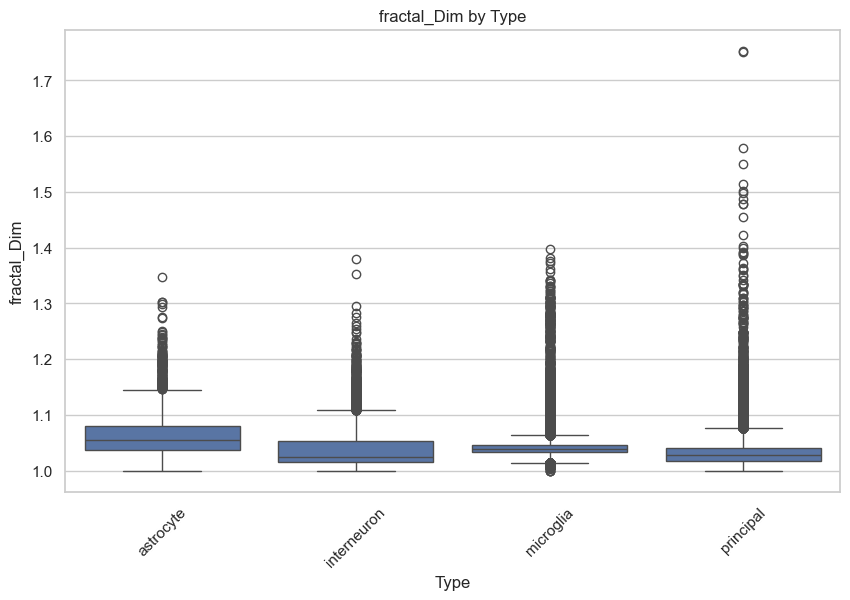

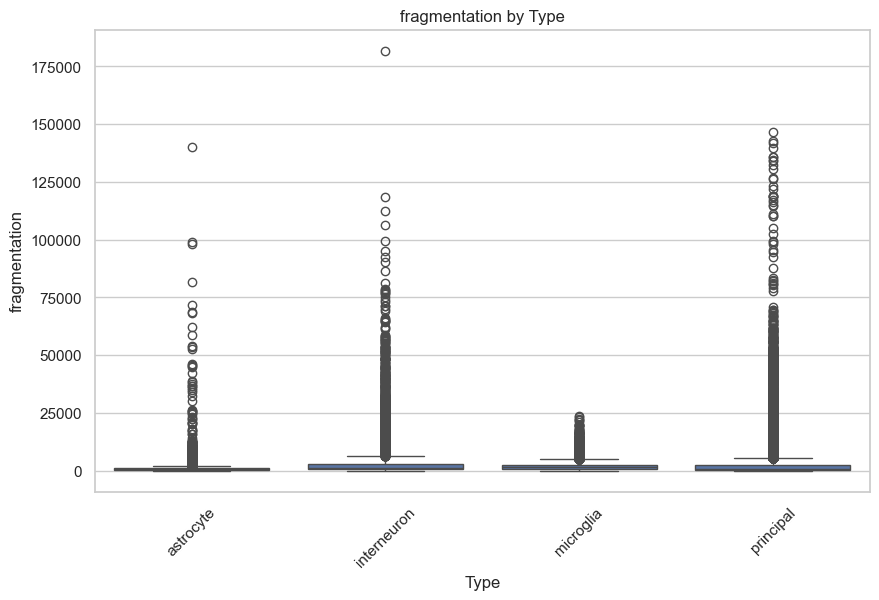

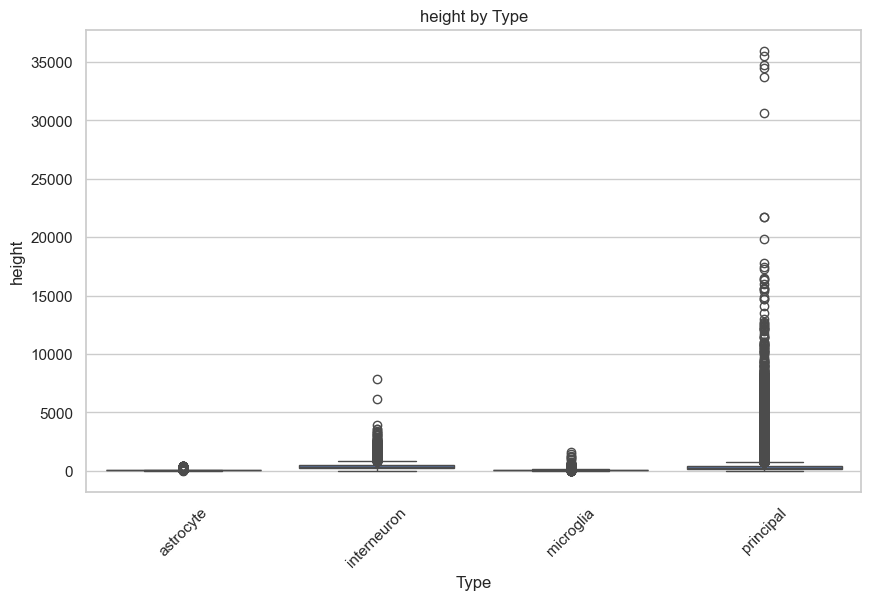

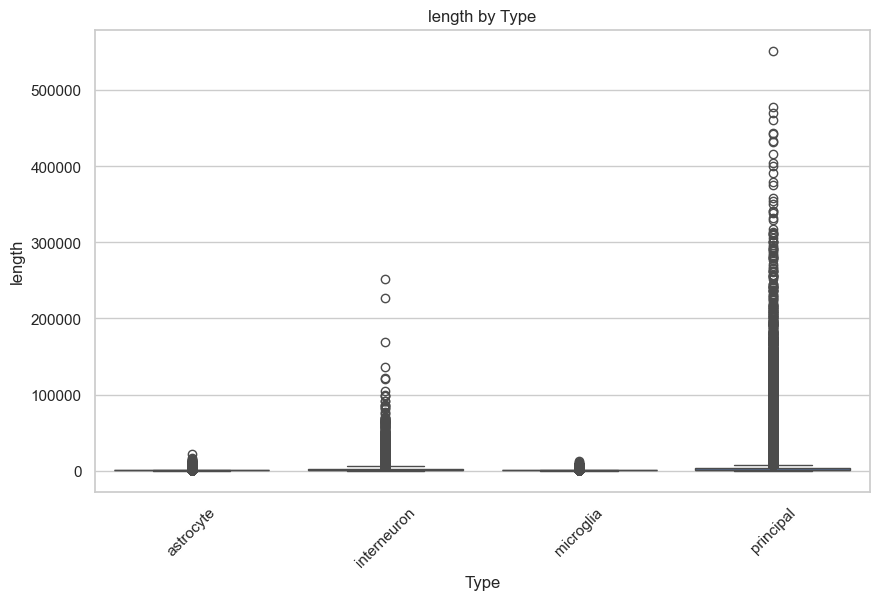

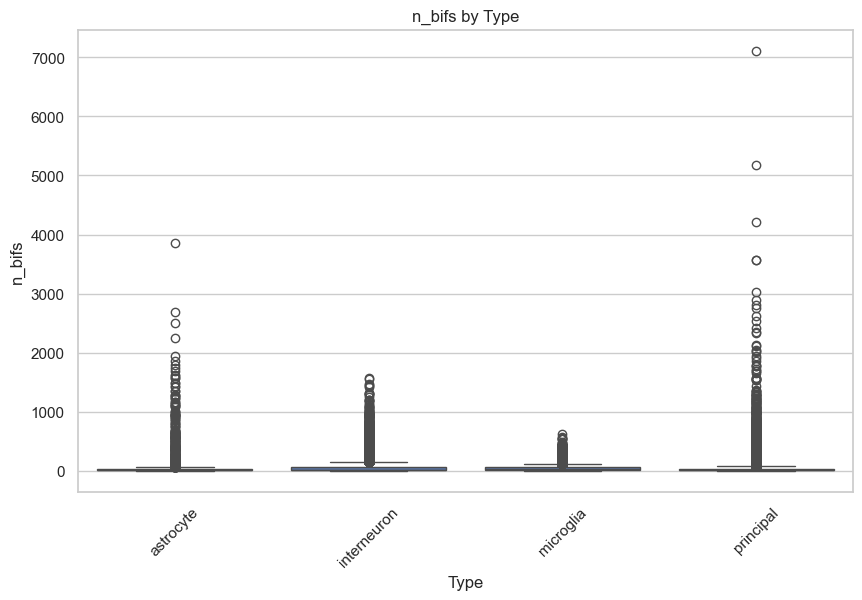

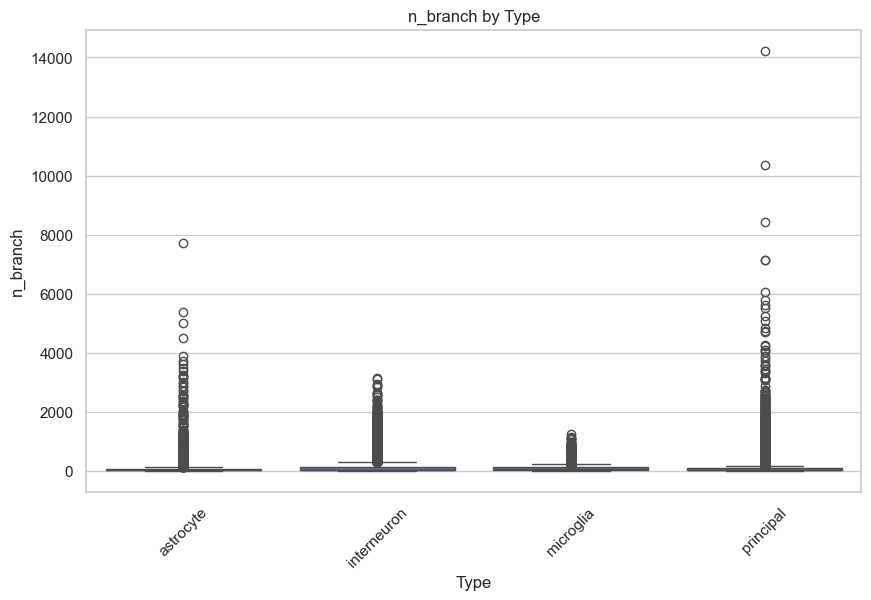

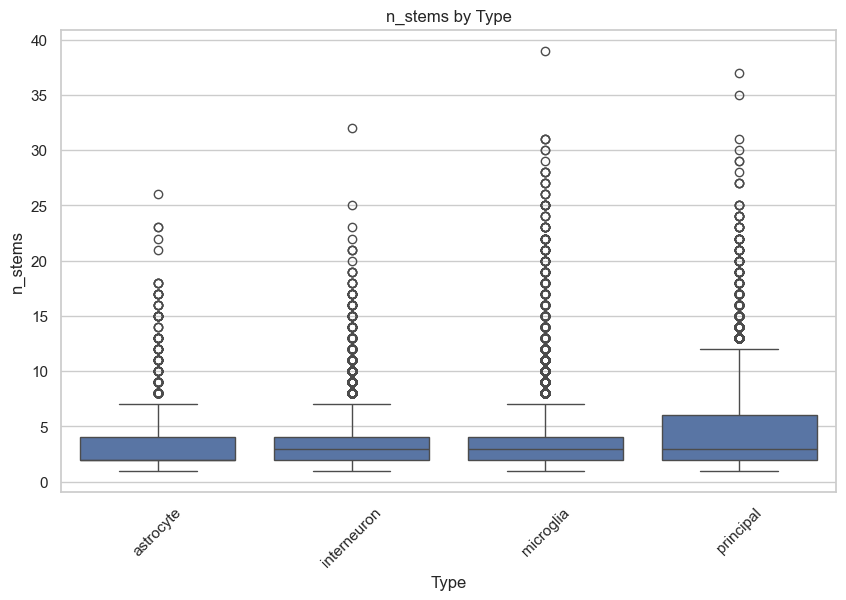

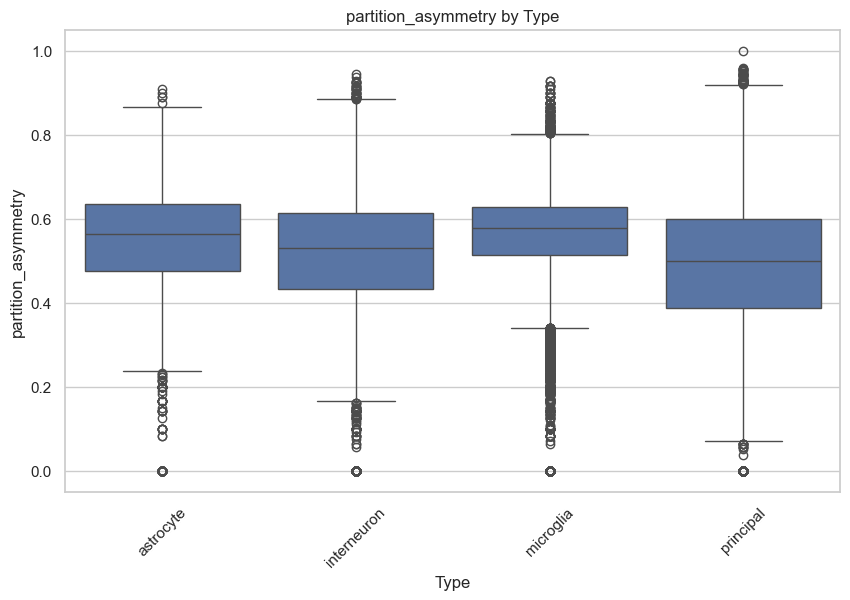

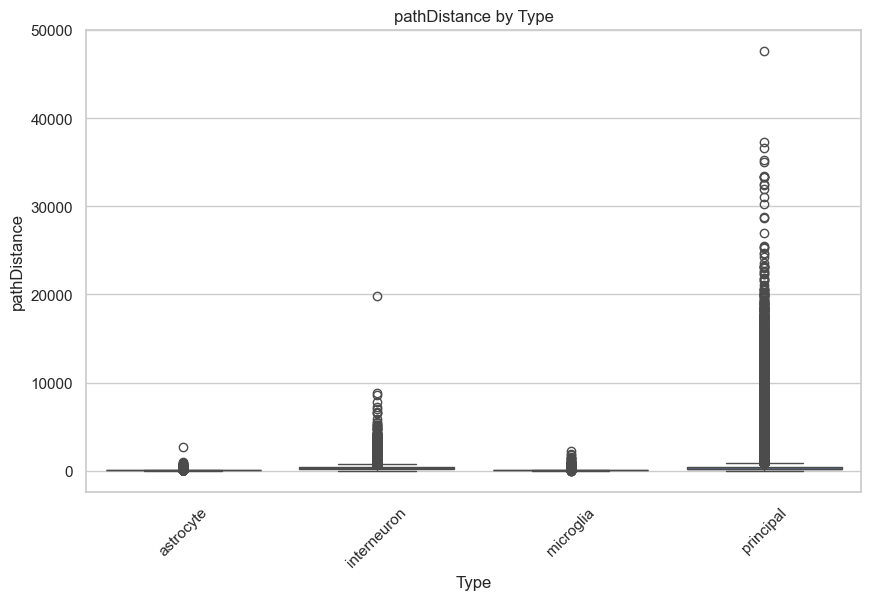

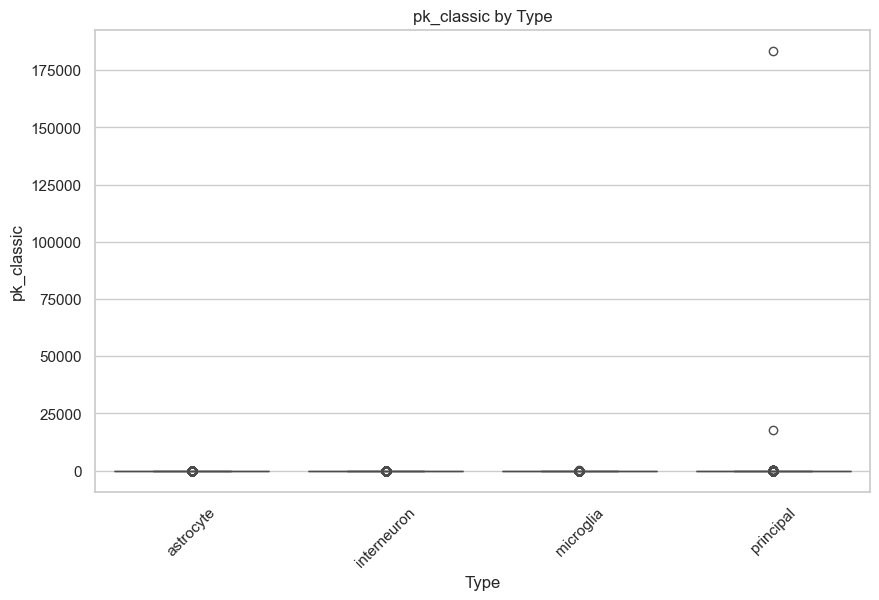

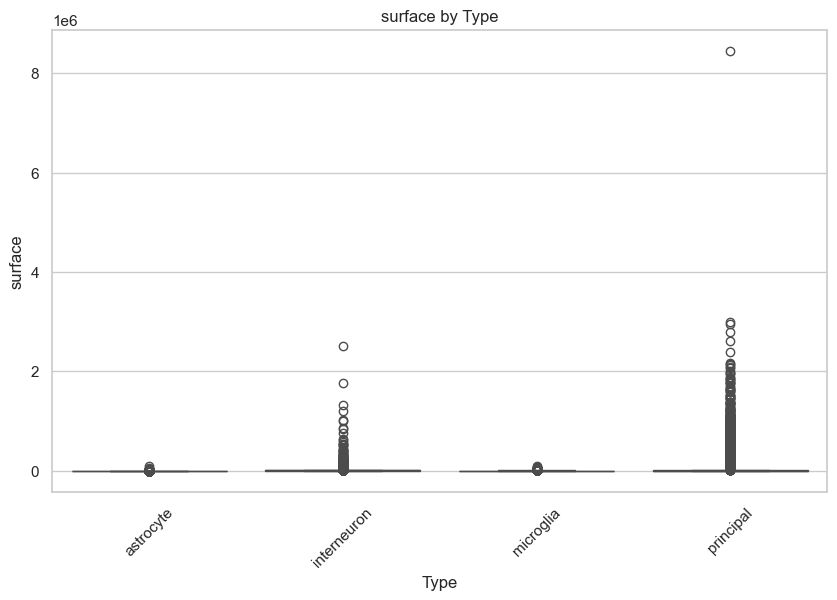

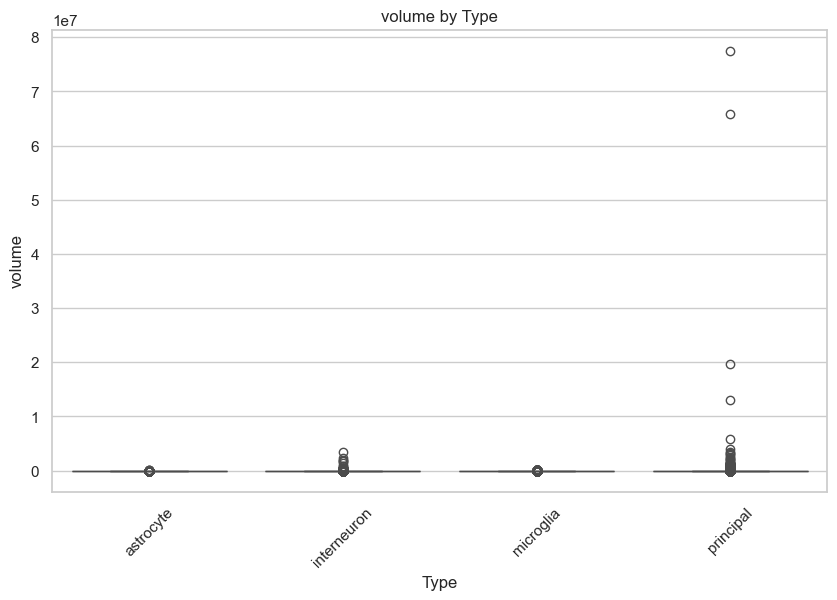

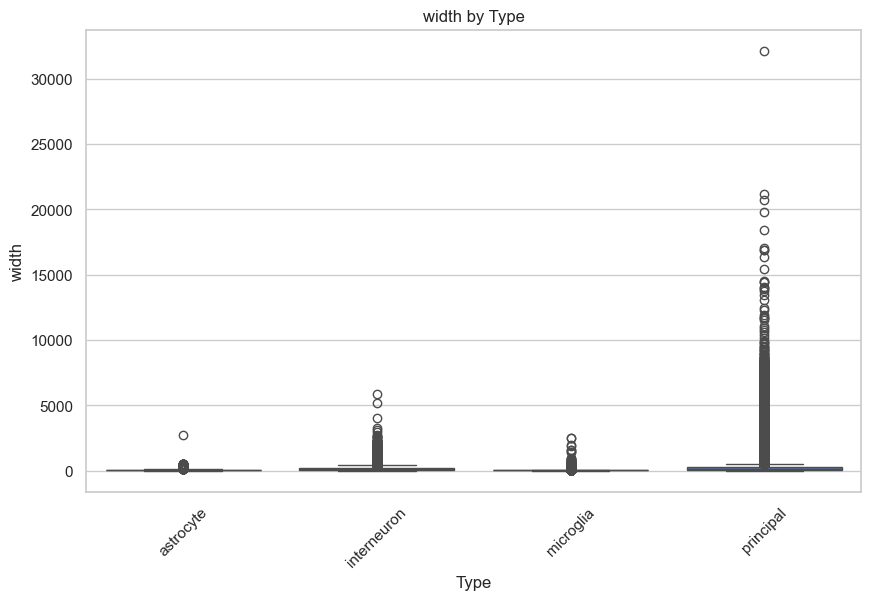

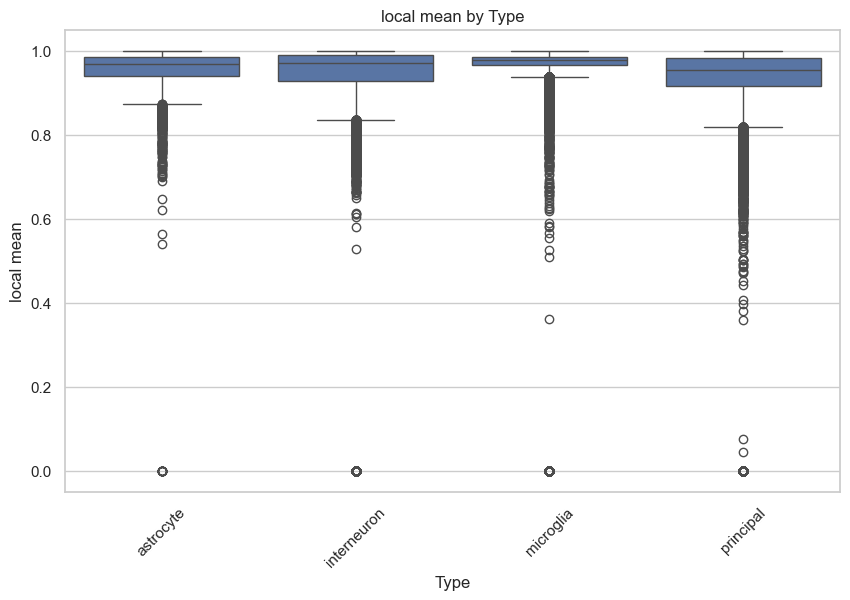

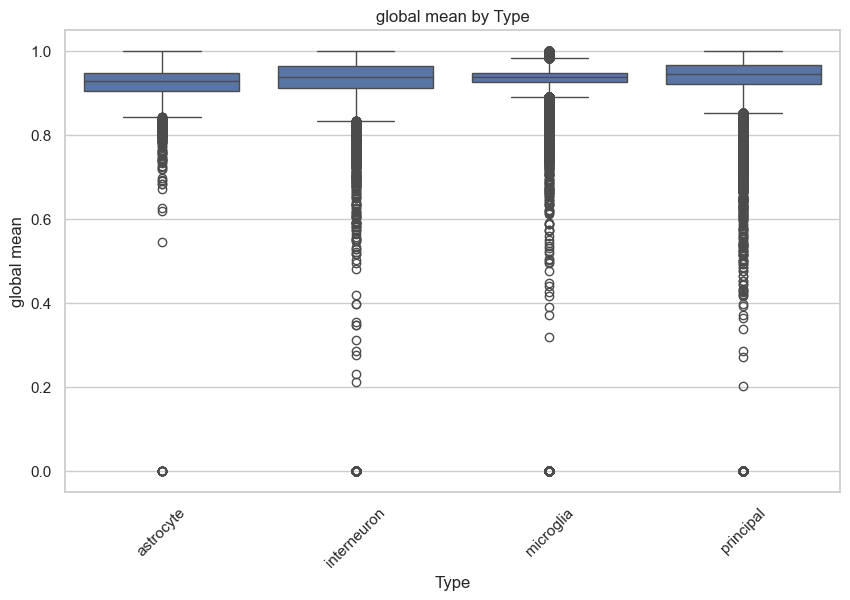

In [15]:
# Visualizing numerical features by Type
for col in numerical_cols:
    if col not in ['neuron_id']:  # Skip neuron_id
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Type', y=col, data=df)
        plt.title(f'{col} by Type')
        plt.xticks(rotation=45)
        plt.show()

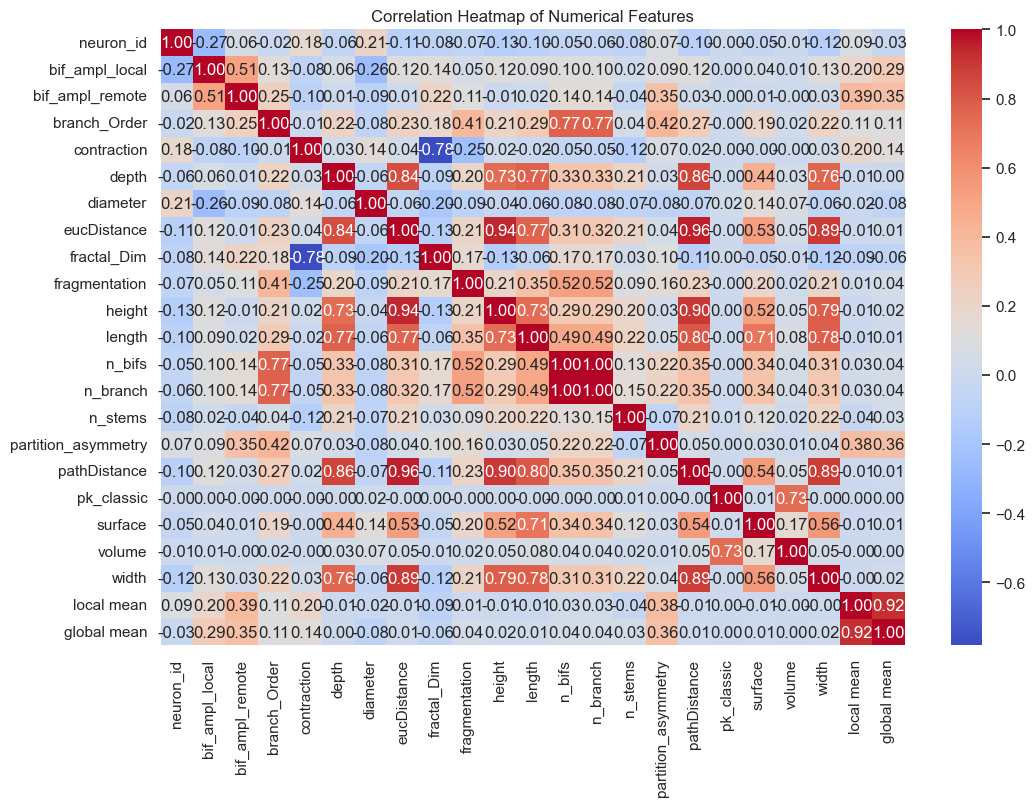

In [16]:
# Correlation heatmap - numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Logistic Regression Model for Classification of 'Type'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135538 entries, 6347 to 141896
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Type                 135538 non-null  category
 1   neuron_id            135538 non-null  int64   
 2   neuron_name          135538 non-null  object  
 3   bif_ampl_local       135538 non-null  float64 
 4   bif_ampl_remote      135538 non-null  float64 
 5   branch_Order         135538 non-null  float64 
 6   contraction          135538 non-null  float64 
 7   depth                135538 non-null  float64 
 8   diameter             135538 non-null  float64 
 9   eucDistance          135538 non-null  float64 
 10  fractal_Dim          135538 non-null  float64 
 11  fragmentation        135538 non-null  int64   
 12  height               135538 non-null  float64 
 13  length               135538 non-null  float64 
 14  n_bifs               135538 non-null  int64   
 15  n_

In [18]:
# Define X and y
X = df.drop(['Type', 'neuron_id', 'neuron_name'], axis=1)
y = df['Type']

In [19]:
# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Scale all features after split (avoid data leakage)
scaler = StandardScaler()
# Fit scaler on training data only
X_train = scaler.fit_transform(X_train)
# Transform test data using the fitted scaler
X_test = scaler.transform(X_test)

In [21]:
# Encode the target 'Type' 
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [22]:
# Train Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train_encoded)

C:\Users\manju\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [23]:
# Make predictions
y_pred = lr_model.predict(X_test)

In [24]:
# Evaluate the model
print("\nAccuracy Score:")
print(accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_, zero_division=0))


Accuracy Score:
0.8244798583444002

Classification Report:
              precision    recall  f1-score   support

   astrocyte       0.77      0.45      0.57       878
 interneuron       0.53      0.08      0.14      3121
   microglia       0.89      0.96      0.93     11355
   principal       0.78      0.92      0.84     11754

    accuracy                           0.82     27108
   macro avg       0.74      0.60      0.62     27108
weighted avg       0.80      0.82      0.79     27108



In [25]:
# Confusion matrix
print("\nConfusion Matrix (NumPy array):")
cm = confusion_matrix(y_test_encoded, y_pred)
print(cm)
print("\nConfusion Matrix (Pandas DataFrame):")
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
print(cm_df)


Confusion Matrix (NumPy array):
[[  394     1   415    68]
 [    2   242   213  2664]
 [   65     4 10952   334]
 [   53   212   727 10762]]

Confusion Matrix (Pandas DataFrame):
             astrocyte  interneuron  microglia  principal
astrocyte          394            1        415         68
interneuron          2          242        213       2664
microglia           65            4      10952        334
principal           53          212        727      10762


In [26]:
# Feature coefficients
coef_df = pd.DataFrame(lr_model.coef_.T, index=X.columns, columns=le.classes_)
print("\nFeature Coefficients (per class):")
print(coef_df)


Feature Coefficients (per class):
                     astrocyte  interneuron  microglia  principal
bif_ampl_local       -0.076645     0.475145  -0.615458   0.216957
bif_ampl_remote      -0.754946    -0.107900   0.919246  -0.056400
branch_Order         -0.195749     0.020556   0.104588   0.070605
contraction           0.037888    -0.232588   0.041160   0.153540
depth                -5.381108    -1.150166   7.869781  -1.338507
diameter             -0.770627     0.014039   0.939310  -0.182723
eucDistance          -8.951089    10.261186 -14.741110  13.431013
fractal_Dim           0.146752    -0.147049  -0.156538   0.156835
fragmentation        -0.150478    -0.074094   0.290051  -0.065479
height              -15.621131    13.042885  -7.991352  10.569597
length                3.850072    -1.910787   0.753901  -2.693185
n_bifs                0.100680     0.125353  -0.152417  -0.073616
n_branch              0.097762     0.116343  -0.148725  -0.065381
n_stems              -0.202960    -0.0772